In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('50_Startups (3).csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [7]:
import seaborn as sns

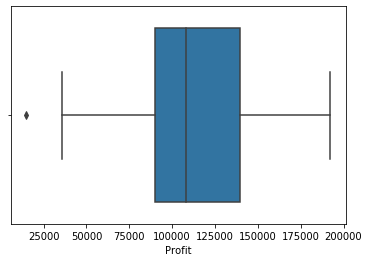

In [8]:
sns.boxplot(df['Profit'])

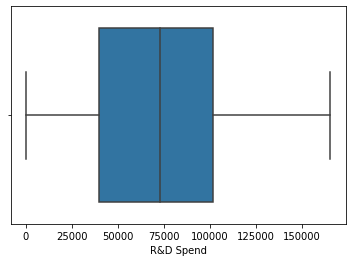

In [9]:
sns.boxplot(df['R&D Spend'])

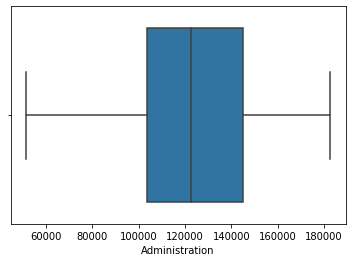

In [10]:
sns.boxplot(df['Administration'])

In [16]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype('category').cat.as_ordered()
        df[label]=df[label].cat.codes

In [17]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [18]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [19]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.score(X_train, y_train)

0.9548541992747326

In [29]:
preds = model.predict(X_test)

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test, preds)

0.9049020268393438

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_test, preds)

82619607.01339942

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(y_test, preds)

7509.441162398425